In [ ]:
#import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
df=pd.read_csv("bank_transactions_data_2.csv")

In [ ]:
#display the 1st 5 records
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
# checkinf for missing value
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
#Data preprocessing
#convert date to date_time foramt
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate']=pd.to_datetime(df['PreviousTransactionDate'])

In [ ]:
#label encoder for catagoriacal column
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['TransactionType']=lr.fit_transform(df['TransactionType'])
df['Channel'] = lr.fit_transform(df['Channel'])
df['CustomerOccupation'] = lr.fit_transform(df['CustomerOccupation'])


In [ ]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,San Diego,D000380,162.198.218.92,M015,0,70,0,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,Houston,D000051,13.149.61.4,M052,0,68,0,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,Mesa,D000235,215.97.143.157,M009,2,19,3,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,Raleigh,D000187,200.13.225.150,M002,2,26,3,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,Atlanta,D000308,65.164.3.100,M091,2,26,3,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

In [ ]:
#using standered scaler for TransactionAmount, TransactionDuration, AccountBalance, CustomerAge
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df[cols] = scaler.fit_transform(df[cols])


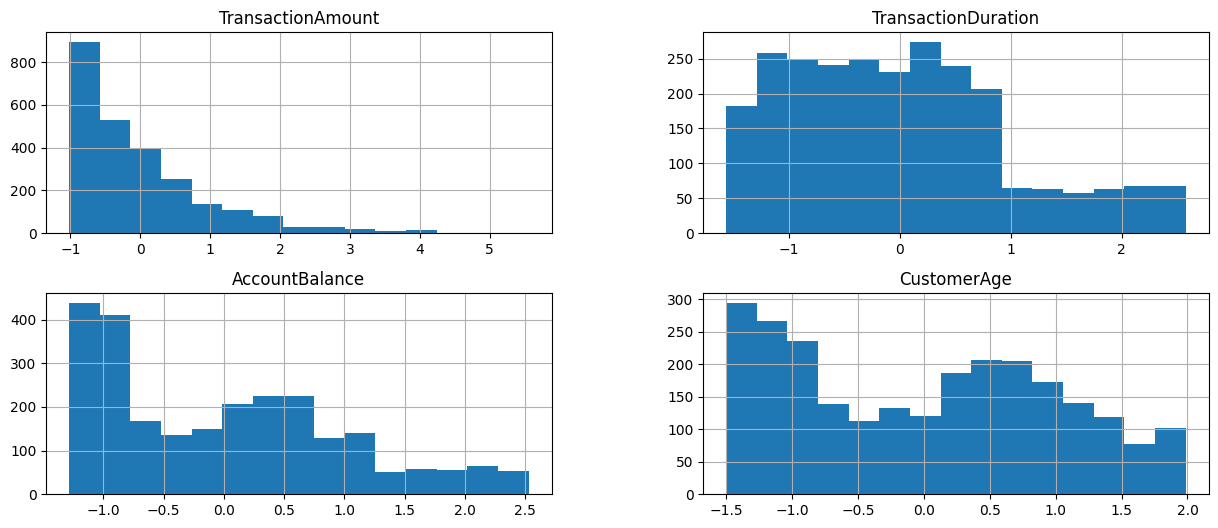

In [ ]:
#univirate analysis
df[cols].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

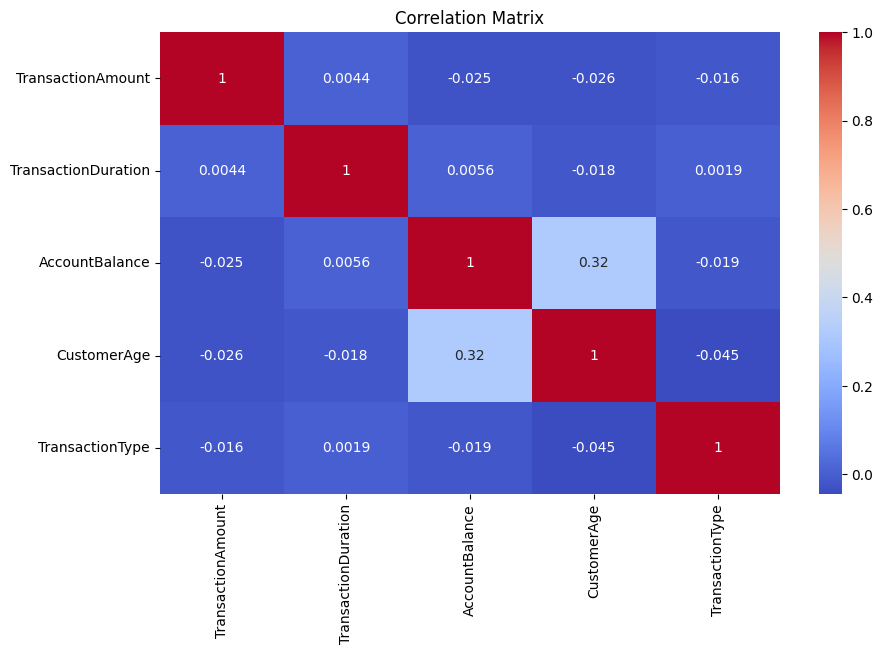

In [ ]:
#corealation between transaction type and cols
plt.figure(figsize=(10, 6))
sns.heatmap(df[cols + ['TransactionType']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#seprate X and y

In [ ]:
X = df[['TransactionAmount', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSinceLastTransaction']]
y = df['TransactionType']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train[:3]

,TransactionAmount,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTransaction
1626,-0.957092,0,0.636700,1,-1.310129,1,0.848143,-593
1313,0.124624,1,0.411837,0,-1.067098,1,0.031552,-593
942,0.509771,0,1.030209,2,-0.609627,1,0.704918,-328


In [ ]:
y_train[:3]

,TransactionType
1626,1
1313,1
942,1


In [ ]:
#using logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#fiting
LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#accuracy and classification report for logistic regression
# Logistic Regression
y_pred = LR.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.78      1.00      0.87       391

    accuracy                           0.78       503
   macro avg       0.39      0.50      0.44       503
weighted avg       0.60      0.78      0.68       503

Logistic Regression Accuracy: 0.7773359840954275


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#using 2.Random Forest Classifier algo
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
##accuracy and classification report for Random forest
y_pred_f = forest.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.06      0.11       112
           1       0.78      0.98      0.87       391

    accuracy                           0.77       503
   macro avg       0.61      0.52      0.49       503
weighted avg       0.71      0.77      0.70       503

Random Forest Accuracy: 0.7733598409542743


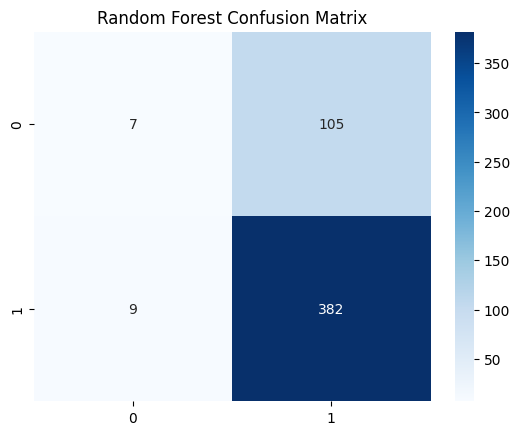

In [ ]:
# Random Forest confusion matrix
conf2 = confusion_matrix(y_test, y_pred_f)
sns.heatmap(conf2, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

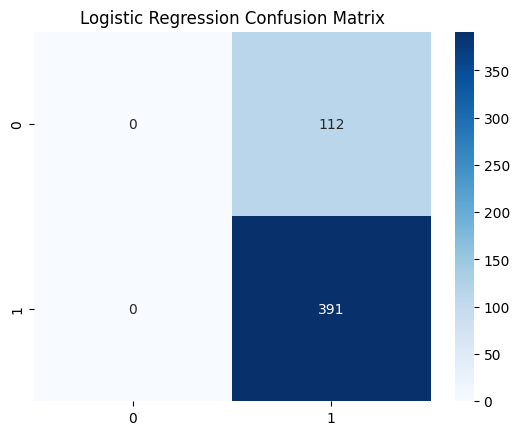

In [ ]:
#confusion matrix
# Logistic Regression
conf1= confusion_matrix(y_test, y_pred)
sns.heatmap(conf1, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()



In [ ]:
#conclusion:s per the confusion matrix  regression model give 78% accuracy and then RandomForestRegressor give 77 % accuracy but there is not large diffifrence in both accuracy
